# i. Introduction

Background :

I have been tasked by an e-commerce company to perform an analysis of their "Shipping and Stock Performance Review for Q1 - Q2 2023." This comprehensive analysis aims to evaluate and provide insights into the company's performance in terms of shipping logistics and stock management during the first two quarters of the year 2023.

Problem Statement : To make the e-commerce company's shipping and stock processes better in the first half of 2023 and suggest improvements to the management in next 6 months.

Link Tableau

Dashboard: https://public.tableau.com/app/profile/kenneth.vincentius/viz/ShippingandStockDataVisualization/Dashboard?publish=yes

Story Telling : https://public.tableau.com/app/profile/kenneth.vincentius/viz/ShippingandStockDataVisualization/Story1?publish=yes


# ii. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# iii. Data Loading

Save data from google big query data using SQL syntax to csv

```sql
SELECT 
    user.age,
    user.gender,
    inventory_items.product_brand,
    inventory_items.product_retail_price,
    inventory_items.product_department,
    order_items.status,
    order_items.created_at,
    order_items.shipped_at,
    order_items.delivered_at,
    order_items.sale_price
FROM 
    `bigquery-public-data.thelook_ecommerce.users` as user
JOIN 
    `bigquery-public-data.thelook_ecommerce.order_items` as order_items ON user.id = order_items.user_id
JOIN 
    `bigquery-public-data.thelook_ecommerce.inventory_items` as inventory_items ON order_items.inventory_item_id = inventory_items.id
WHERE 
    order_items.created_at BETWEEN '2023-01-01' AND '2023-06-30'
    AND order_items.shipped_at BETWEEN '2023-01-01' AND '2023-06-30'
    AND user.age IS NOT NULL
    AND user.gender IS NOT NULL
    AND inventory_items.product_brand IS NOT NULL
    AND inventory_items.product_retail_price IS NOT NULL
    AND inventory_items.product_department IS NOT NULL
    AND order_items.status IS NOT NULL
    AND order_items.created_at IS NOT NULL
    AND order_items.shipped_at IS NOT NULL
    AND order_items.delivered_at IS NOT NULL
    AND order_items.sale_price IS NOT NULL;
```

In [2]:
#load data that has been saved before from google big query
df=pd.read_csv('dataset_fix.csv')
df

,age,gender,product_brand,product_retail_price,product_department,status,created_at,shipped_at,delivered_at,sale_price
0,39,F,Funny Girl Designs,5.99,Women,Returned,2023-05-04 04:04:00.000000 UTC,2023-05-05 15:32:00.000000 UTC,2023-05-06 19:54:00.000000 UTC,5.99
1,18,F,Funny Girl Designs,10.99,Women,Complete,2023-05-23 18:12:01.000000 UTC,2023-05-24 13:44:00.000000 UTC,2023-05-25 13:15:00.000000 UTC,10.99
2,34,M,Perry,16.90,Men,Complete,2023-05-04 01:54:10.000000 UTC,2023-05-06 06:02:00.000000 UTC,2023-05-09 04:12:00.000000 UTC,16.90
3,28,M,Belts.com,9.99,Men,Returned,2023-06-26 03:30:30.000000 UTC,2023-06-26 09:05:00.000000 UTC,2023-06-29 17:41:00.000000 UTC,9.99
4,66,M,Marshal,12.00,Men,Complete,2023-02-01 11:33:29.000000 UTC,2023-01-29 18:40:00.000000 UTC,2023-01-30 00:03:00.000000 UTC,12.00
...,...,...,...,...,...,...,...,...,...,...
11548,21,M,Calvin Klein,24.00,Men,Complete,2023-06-18 02:46:55.000000 UTC,2023-06-19 04:00:00.000000 UTC,2023-06-20 12:09:00.000000 UTC,24.00
11549,14,M,Calvin Klein,26.00,Men,Complete,2023-04-12 16:37:20.000000 UTC,2023-04-13 01:28:00.000000 UTC,2023-04-17 21:08:00.000000 UTC,26.00
11550,56,M,Calvin Klein,24.00,Men,Complete,2023-04-29 13:08:40.000000 UTC,2023-04-28 05:30:00.000000 UTC,2023-04-29 11:55:00.000000 UTC,24.00
11551,25,M,Calvin Klein,26.00,Men,Complete,2023-04-29 15:21:42.000000 UTC,2023-04-30 04:42:00.000000 UTC,2023-05-02 17:46:00.000000 UTC,26.00


In [3]:
#look data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11553 entries, 0 to 11552
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   11553 non-null  int64  
 1   gender                11553 non-null  object 
 2   product_brand         11546 non-null  object 
 3   product_retail_price  11553 non-null  float64
 4   product_department    11553 non-null  object 
 5   status                11553 non-null  object 
 6   created_at            11553 non-null  object 
 7   shipped_at            11553 non-null  object 
 8   delivered_at          11553 non-null  object 
 9   sale_price            11553 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 902.7+ KB


In [4]:
#change column create_at, shipped_at, delivered_at from object to datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['shipped_at'] = pd.to_datetime(df['shipped_at'])
df['delivered_at'] = pd.to_datetime(df['delivered_at'])

In [5]:
#look data type that has been change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11553 entries, 0 to 11552
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   age                   11553 non-null  int64              
 1   gender                11553 non-null  object             
 2   product_brand         11546 non-null  object             
 3   product_retail_price  11553 non-null  float64            
 4   product_department    11553 non-null  object             
 5   status                11553 non-null  object             
 6   created_at            11553 non-null  datetime64[ns, UTC]
 7   shipped_at            11553 non-null  datetime64[ns, UTC]
 8   delivered_at          11553 non-null  datetime64[ns, UTC]
 9   sale_price            11553 non-null  float64            
dtypes: datetime64[ns, UTC](3), float64(2), int64(1), object(4)
memory usage: 902.7+ KB


In [6]:
#make new column for delivery duration
df['delivery_duration'] = df['delivered_at'] - df['shipped_at']

In [7]:
#check wheter the column has been created or not
df

,age,gender,product_brand,product_retail_price,product_department,status,created_at,shipped_at,delivered_at,sale_price,delivery_duration
0,39,F,Funny Girl Designs,5.99,Women,Returned,2023-05-04 04:04:00+00:00,2023-05-05 15:32:00+00:00,2023-05-06 19:54:00+00:00,5.99,1 days 04:22:00
1,18,F,Funny Girl Designs,10.99,Women,Complete,2023-05-23 18:12:01+00:00,2023-05-24 13:44:00+00:00,2023-05-25 13:15:00+00:00,10.99,0 days 23:31:00
2,34,M,Perry,16.90,Men,Complete,2023-05-04 01:54:10+00:00,2023-05-06 06:02:00+00:00,2023-05-09 04:12:00+00:00,16.90,2 days 22:10:00
3,28,M,Belts.com,9.99,Men,Returned,2023-06-26 03:30:30+00:00,2023-06-26 09:05:00+00:00,2023-06-29 17:41:00+00:00,9.99,3 days 08:36:00
4,66,M,Marshal,12.00,Men,Complete,2023-02-01 11:33:29+00:00,2023-01-29 18:40:00+00:00,2023-01-30 00:03:00+00:00,12.00,0 days 05:23:00
...,...,...,...,...,...,...,...,...,...,...,...
11548,21,M,Calvin Klein,24.00,Men,Complete,2023-06-18 02:46:55+00:00,2023-06-19 04:00:00+00:00,2023-06-20 12:09:00+00:00,24.00,1 days 08:09:00
11549,14,M,Calvin Klein,26.00,Men,Complete,2023-04-12 16:37:20+00:00,2023-04-13 01:28:00+00:00,2023-04-17 21:08:00+00:00,26.00,4 days 19:40:00
11550,56,M,Calvin Klein,24.00,Men,Complete,2023-04-29 13:08:40+00:00,2023-04-28 05:30:00+00:00,2023-04-29 11:55:00+00:00,24.00,1 days 06:25:00
11551,25,M,Calvin Klein,26.00,Men,Complete,2023-04-29 15:21:42+00:00,2023-04-30 04:42:00+00:00,2023-05-02 17:46:00+00:00,26.00,2 days 13:04:00


In [8]:
#check missing value
df.isnull().sum()

age                     0
gender                  0
product_brand           7
product_retail_price    0
product_department      0
status                  0
created_at              0
shipped_at              0
delivered_at            0
sale_price              0
delivery_duration       0
dtype: int64

In [9]:
#drop missing value since missing value below 5%
df1 = df.dropna(subset=['product_brand'])

In [10]:
#check for missing value that has been drop
df1.isnull().sum()

age                     0
gender                  0
product_brand           0
product_retail_price    0
product_department      0
status                  0
created_at              0
shipped_at              0
delivered_at            0
sale_price              0
delivery_duration       0
dtype: int64

### Exploratory Data Analyst

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


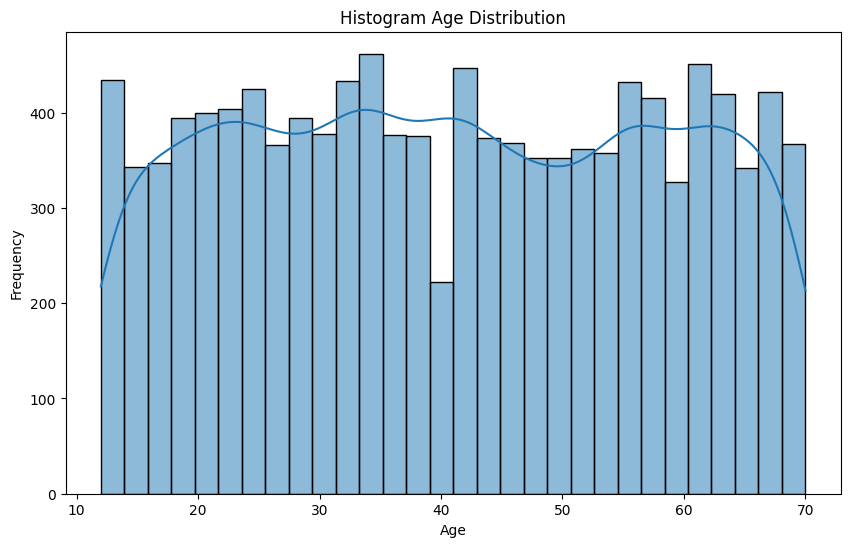

In [11]:
#Histogram Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df1['age'], bins=30, kde=True)
plt.title('Histogram Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Results:

If we see that the age distribution of customers is dominated by adults aged 20-40 who are in their productive age

Insight :

The selection of products in stock that is large can be considered based on the age of the customers who buy the most to avoid death stock

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


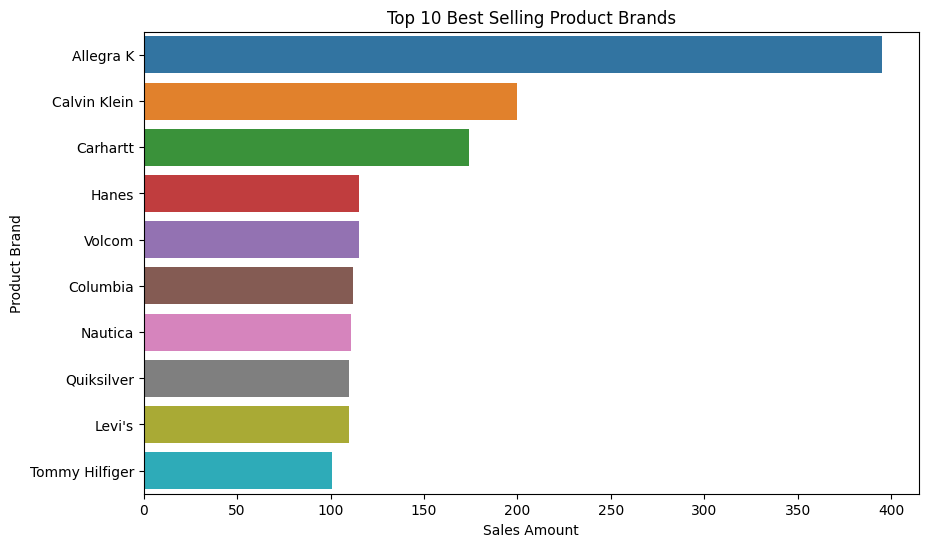

In [12]:
#Product Brand Analysis (Top 10)
top10_brands = df1['product_brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_brands.values, y=top10_brands.index)
plt.title('Top 10 Best Selling Product Brands')
plt.xlabel('Sales Amount')
plt.ylabel('Product Brand')
plt.show()

Results:

It can be seen that the brand above has a high level of sales compared to other brands

Insight :

Companies can carry out larger stocks of goods from the brands above, especially Allegra R, Calvin Klein, and Carharrt so they can get cheaper purchasing prices to increase profits by buying more of the brands with the highest sales.

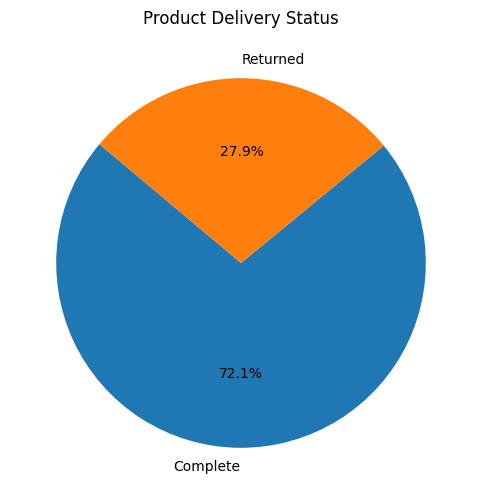

In [13]:
#Calculates the amount for each delivery status
status_counts = df1['status'].value_counts()

#Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Delivery Status')
plt.show()

Results:

It can be seen that the percentage rate of returned goods is quite high at 27.9%

Insights:

If there is a high return rate, this could be an indicator of a product quality problem or a mismatch in customer expectations. Businesses should evaluate quality control processes and may need to improve product descriptions to reduce returns

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

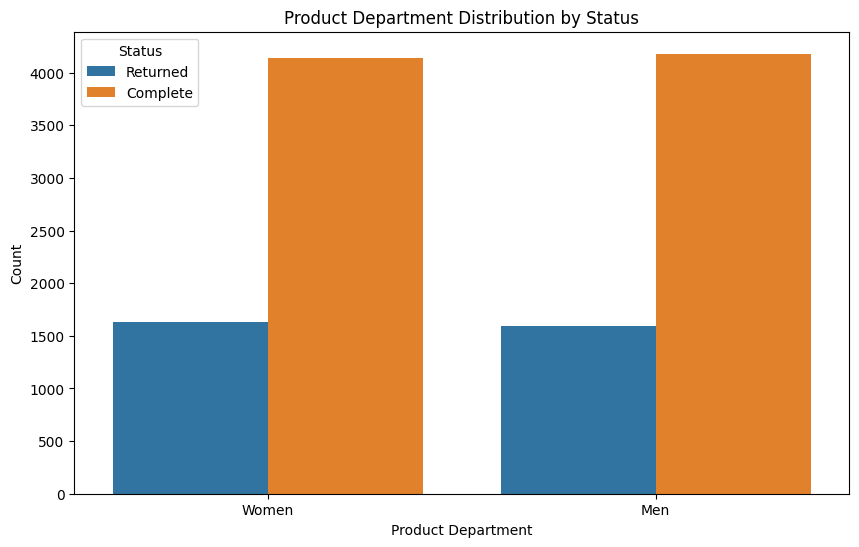

In [29]:
#Product Department Distribution by Status
plt.figure(figsize=(10, 6))
sns.countplot(x='product_department', hue='status', data=df1)
plt.title('Product Department Distribution by Status')
plt.xlabel('Product Department')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

Result: 

It is observed that the delivery status comparison between women and men is not significantly different.

Insight: 

Given the similar delivery status between women and men, companies can seize this opportunity to enhance their delivery services by focusing on speed, efficiency, and reliability, which are important factors for all customers. Furthermore, developing a loyalty program or special offers that appeal to all customer segments can boost customer retention and drive increased sales.

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


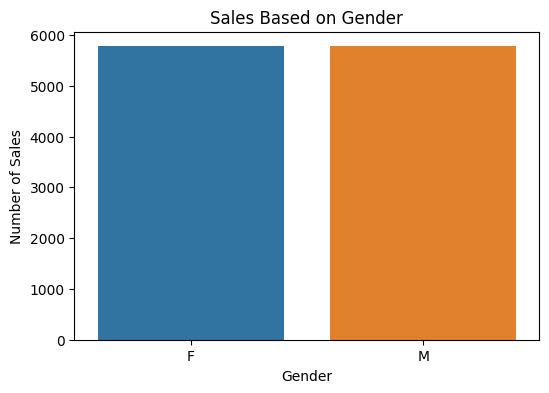

In [14]:
#Number of Sales Based on Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df1)
plt.title('Sales Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Sales')
plt.show()

Results:
The numbers for men and women are not too different so knowing which products are popular among men and women can help in targeting promotions and arranging stock.

Insights:
The product with the highest sales is from the Allerga K brand, which is a brand for women, so the company increases stock and promotions for this product in the women's market segment compared to men's products

C:\Users\kenne\AppData\Local\Temp\ipykernel_5640\2014472290.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['created_month'] = df2['created_at'].dt.month
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData

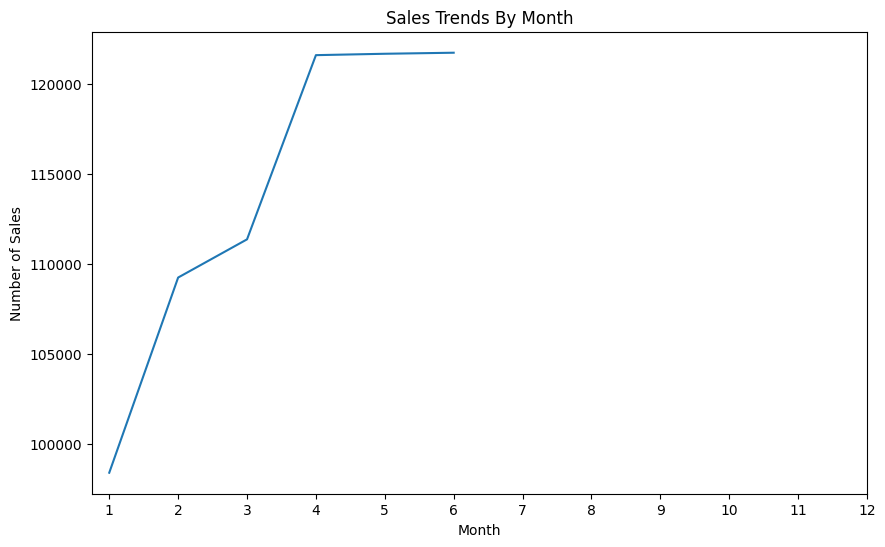

In [15]:
#Sales Trends By Month

#create dummy
df2=df1

#create new column 'created_month'
df2['created_month'] = df2['created_at'].dt.month

#Calculates sales trends by month
sales_trend_by_month = df2.groupby('created_month')['sale_price'].sum()

#create visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_trend_by_month.index, y=sales_trend_by_month.values)
plt.title('Sales Trends By Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(range(1, 13))
plt.show()

Results:

The highest sales are from April to June, which is the month of Eid and getting holiday allowence


Insights:

Companies can prepare more stock during that month and ensure deliveries run smoothly by increasing the number of couriers to avoid complaints and returns due to long deliveries.

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


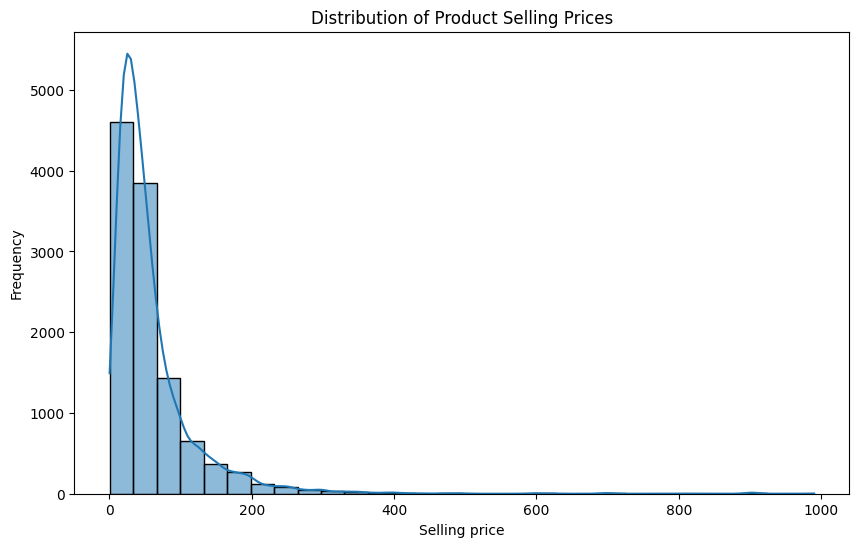

In [16]:
#Distribution of Product Selling Prices
plt.figure(figsize=(10, 6))
sns.histplot(df1['sale_price'], bins=30, kde=True)
plt.title('Distribution of Product Selling Prices')
plt.xlabel('Selling price')
plt.ylabel('Frequency')
plt.show()

Results:

Goods with low prices are purchased more often than those with high prices

Insights:

Companies can focus their stock more on goods with lower prices than high prices to avoid unsold goods because the frequency of purchasing low goods is higher than goods with high prices

### Statistic Descriptive

In [17]:
print('Age')
print('Average Age of Customer:',df1['age'].mean())
print('Median Age of Customer:',df1['age'].median())
print('Modus Age of Customer:',df1['age'].mode())
print(f"Skewness Age of Customer:: {df1['age'].skew()}")

Age
Average Age of Customer: 40.90048501645592
Median Age of Customer: 41.0
Modus Age of Customer: 0    34
Name: age, dtype: int64
Skewness Age of Customer:: 0.01713877583170625


Result: 

The average customer age is around 41 years, with the most common age being 34. The age distribution is nearly symmetrical, indicating a customer base that spans a wide range of ages, but is centered around middle-aged adults.

Insight: 

Given the age profile of the customers, it's beneficial for the business to focus on products and marketing strategies that appeal to middle-aged adults, while also considering the preferences of customers in their early thirties. Offering a variety of products that cater to this diverse age group could maximize customer reach and satisfaction.

### Statistic Inferencial

Calculates the relationship between status and delivery_duration

H0 = There is no significant relationship between status and delivery_duration

H1 = There is a significant relationship between status and delivery_duration

Significance level = 0.05

If the p-value <- 0.05, then H0 is rejected

If the p-value is >0.05, then H0 cannot be rejected

In [18]:
#Convert the time column to datetime and create a delivery duration column

#create copy data
df2=df1

df2['created_at'] = pd.to_datetime(df2['created_at'])
df2['shipped_at'] = pd.to_datetime(df2['shipped_at'])
df2['delivered_at'] = pd.to_datetime(df2['delivered_at'])
df2['delivery_duration'] = df2['delivered_at'] - df2['shipped_at']
df2['delivery_duration_hours'] = df2['delivery_duration'].dt.total_seconds() / 3600

#Converts delivery statuses into numeric variables for correlation analysis with 0 returned 
df2['status_numeric'] = df2['status'].apply(lambda x: 1 if x == 'Complete' else 0)

#Calculates statistical correlation between delivery status and delivery duration
correlation, p_value = stats.pearsonr(df2['status_numeric'], df2['delivery_duration_hours'])

print(f"r-correlation: {correlation:.2f}, p-value: {p_value}")


r-correlation: -0.01, p-value: 0.34292974541397203


C:\Users\kenne\AppData\Local\Temp\ipykernel_5640\1415587384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['created_at'] = pd.to_datetime(df2['created_at'])
C:\Users\kenne\AppData\Local\Temp\ipykernel_5640\1415587384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['shipped_at'] = pd.to_datetime(df2['shipped_at'])
C:\Users\kenne\AppData\Local\Temp\ipykernel_5640\1415587384.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

The statistical correlation between delivery status and delivery duration resulted in a correlation value of -0.0086 and a p-value of 0.354.

The very small correlation value (-0.0086) indicates that there is almost no significant linear relationship between the delivery status and the duration of delivery. This means that the length of time a delivery takes does not significantly affect whether the delivery will be successful or returned.

Furthermore, a p-value higher than 0.05 suggests that this relationship is not statistically significant. Therefore, based on this data, it can be concluded that there is no significant correlation between the duration of delivery and whether the delivery is successful or not, then H0 cannot be rejected

# v. Conclusion

To optimize stock and sales, the business should prioritize products that appeal to middle-aged adults and those in their early thirties, focusing on popular brands like Allegra R, Calvin Klein, and Carhartt. High return rates need addressing, potentially indicating quality or expectation mismatches, and more emphasis should be placed on women's products, particularly from the Allegra K brand. It's also beneficial to stock more affordable items, as they tend to sell more frequently, delivery duration does not significantly impact delivery success.

# vi. Data Saving

In [25]:
#saving new data to csv
df1.to_csv('dataset_finals.csv', index=False)